In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from deficit_defs import *

Splikes version  0.1.0
Plasticnet version  0.1.4
macOS-10.16-x86_64-i386-64bit
Base Image File: asdf/bbsk081604_all_log2dog.asdf


In [3]:
savepath="/Users/bblais/Desktop/Spring 2022/arvo 2022/figures"

In [4]:
from include_2021_10_21 import *

Version 0.0.5


In [5]:
# import matplotlib.font_manager
# from IPython.core.display import HTML

# def make_html(fontname):
#     return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

# code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

# HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [6]:
rcParams['font.sans-serif']=['Source Sans Pro']

In [7]:
weak_i=0
strong_i=1

In [8]:
loadvars('sims-2021-11-19/glasses_results.asdf')
loadvars('sims-2021-11-19/patch_results.asdf')
loadvars('sims-2021-11-19/atropine_results.asdf')
loadvars('sims-2021-11-19/contrast_results.asdf')
loadvars('sims-2021-11-19/mask_results.asdf')

Found ['glasses_result']
Found ['patch_result']
Found ['atropine_result']
Found ['contrast_result']
Found ['mask_result']


/Users/bblais/Desktop/Spring 2022/arvo 2022/figures/patch_treatment.pdf


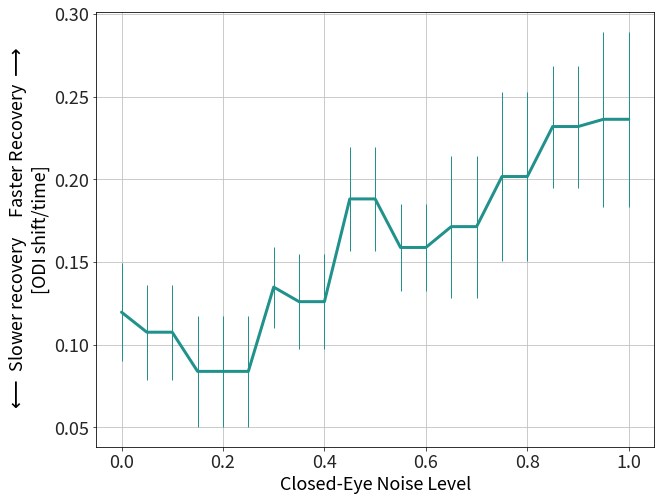

In [11]:
import cycler
colormap=cm.viridis

n = 5
#colormap=cm.Blues
#color = colormap(np.linspace(1, 0,int(1.2*n)))

colormap=cm.viridis
color = colormap(np.linspace(0, 1,n))


noise,recovery_rate_μ,recovery_rate_σ=patch_result        


errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,color=color[2]) # positive = recovery
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
xlabel('Closed-Eye Noise Level')
#title('Patch Treatment')

sfname=f"{savepath}/patch_treatment.pdf"
print(sfname)
savefig(sfname,bbox_inches="tight")


/Users/bblais/Desktop/Spring 2022/arvo 2022/figures/atropine_treatment.pdf


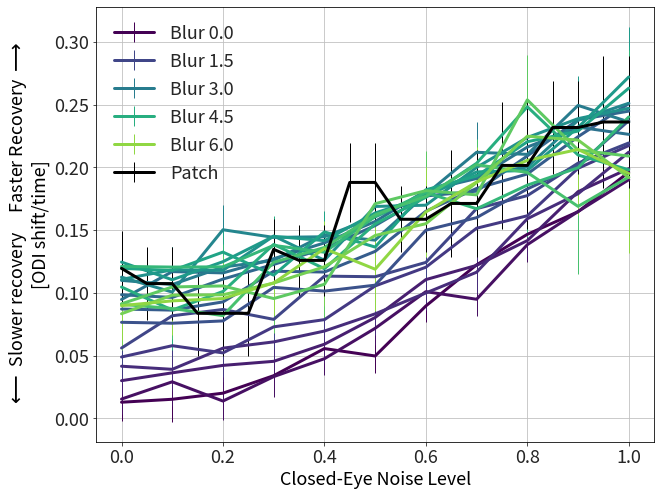

In [12]:
import cycler
colormap=cm.viridis
n = 25
#color = colormap(np.linspace(1, 0,int(1.2*n)))
color = colormap(np.linspace(0, 1,n))
#mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)



noise,blur,recovery_rate_μ,recovery_rate_σ=atropine_result
blur_N=blur.shape[1]
for b in range(blur_N):
    
    if blur[0,b] in [0,1.5,3,4.5,6]:
        errorbar(noise[:,b],-recovery_rate_μ[:,b],yerr=2*recovery_rate_σ[:,b],elinewidth=1,
                 label=f'Blur {blur[0,b]}',color=color[b]) # positive = recovery
    else:
        errorbar(noise[:,b],-recovery_rate_μ[:,b],yerr=2*recovery_rate_σ[:,b],elinewidth=1,
                 color=color[b]) # positive = recovery
        
        
noise,recovery_rate_μ,recovery_rate_σ=patch_result        
errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,color='k',label='Patch') # positive = recovery
        
        
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
xlabel('Closed-Eye Noise Level')
#title('Atropine Treatment')
    
legend()
sfname=f"{savepath}/atropine_treatment.pdf"
print(sfname)
savefig(sfname,bbox_inches="tight")


/Users/bblais/Desktop/Spring 2022/arvo 2022/figures/contrast_mask_treatment.pdf


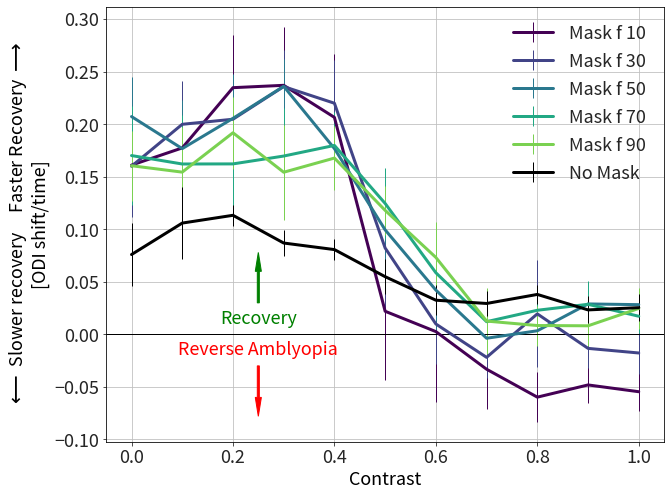

In [13]:
import cycler
f_mat=array([10,30,50,70,90])
f_N=len(f_mat)


n = len(f_mat)+1
#colormap=cm.Blues
#color = colormap(np.linspace(1, 0,int(1.2*n)))
colormap=cm.viridis
color = colormap(np.linspace(0, 1,int(n)))
#mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

f,contrast,recovery_rate_μ,recovery_rate_σ=mask_result
for fi in range(f_N):
    
    errorbar(contrast[fi,:],-recovery_rate_μ[fi,:],yerr=2*recovery_rate_σ[fi,:],elinewidth=1,
             label=f'Mask f {f[fi,0]}',color=color[fi]) # positive = recovery

    
    
contrast,recovery_rate_μ,recovery_rate_σ=contrast_result
errorbar(contrast,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,color='k',label='No Mask') # positive = recovery

    
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")

xlabel('Contrast')
#title('Contrast+Mask Treatment')
    
xl=gca().get_xlim()
plot(xl,[0,0],'k-',lw=1)
gca().set_xlim(xl)
    
text(0.25,0.015,'Recovery',ha='center',va='center',color='green')
text(0.25,-0.015,'Reverse Amblyopia',ha='center',va='center',color='red')
arrow(.25,-.03,0,-.03,width=0.004,color='red')
arrow(.25,.03,0,.03,width=0.004,color='green')
legend()

sfname=f"{savepath}/contrast_mask_treatment.pdf"
print(sfname)
savefig(sfname,bbox_inches="tight")


In [26]:
color

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.229739, 0.322361, 0.545706, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.369214, 0.788888, 0.382914, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

/Users/bblais/Desktop/Spring 2022/arvo 2022/figures/glasses_fix.pdf


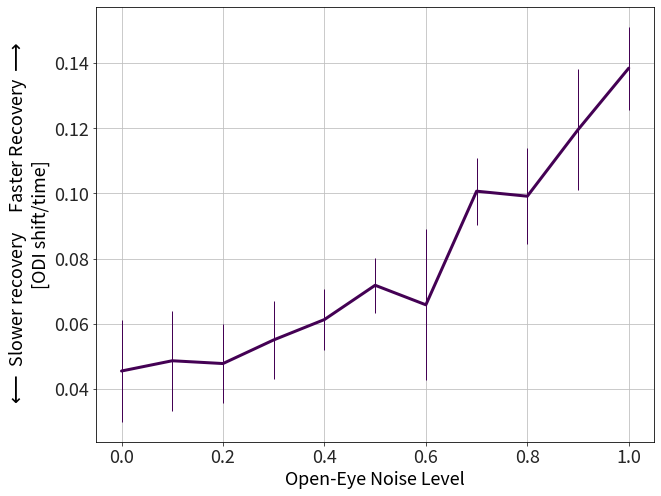

In [15]:
import cycler
n = 5
color = cm.viridis(np.linspace(0, 1,n))

noise,recovery_rate_μ,recovery_rate_σ=glasses_result

errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,
        color=color[0]) # positive = recovery
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
xlabel('Open-Eye Noise Level')
#title('Glasses Fix')

sfname=f"{savepath}/glasses_fix.pdf"
print(sfname)
savefig(sfname,bbox_inches="tight")
